# 9.1 术语速成

# 9.2 ANOVA模型拟合

## 9.2.1 aov()函数

aov()函数的语法为aov(formula,data=dataframe)。
![R表达式中的特殊符号.jpg](./image/R表达式中的特殊符号.jpg)
其中y是因变量，字母A、B、C代表因子。

下表是一些常见的额研究设计表达式。

小写字母表示定量变量

大写字母表示组别因子

subject是对被试者独有的标识变量。

![常见研究设计的表达式.jpg](./image/常见研究设计的表达式.jpg)

## 9.2.2 表达式中各项的顺序

表达式中效应的顺序在两种情况下会造成影响：

    （1）因子不止一个，并且是非平衡设计；
    （2）存在协变量。

出现任意一种情况时，等式右边的变量都与其他每个变量相关。

此时，我们无法清晰地划分它们对因变量的影响。

R默认类型I（序贯型）方法计算ANOVA效应。（参考下面的补充内容）
![顺序很重要.jpg](./image/顺序很重要.jpg)

car包中的Anova()函数（不要与标准anova()函数混淆）提供了使用类型Ⅱ或类型Ⅲ方法的选项

aov()函数使用的是类型I方法

# 9.3 单因素方差分析

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsThe following objects are masked from cholesterol (pos = 4):

    response, trt

The following objects are masked from cholesterol (pos = 5):

    response, trt



trt
 1time 2times 4times  drugD  drugE 
    10     10     10     10     10 

Group.1,x
1time,5.78197
2times,9.22497
4times,12.37478
drugD,15.36117
drugE,20.94752


Group.1,x
1time,2.878113
2times,3.483054
4times,2.923119
drugD,3.454636
drugE,3.345003


            Df Sum Sq Mean Sq F value   Pr(>F)    
trt          4 1351.4   337.8   32.43 9.82e-13 ***
Residuals   45  468.8    10.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Installing package into 'C:/Users/acer/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'gplots' is in use and will not be installed"

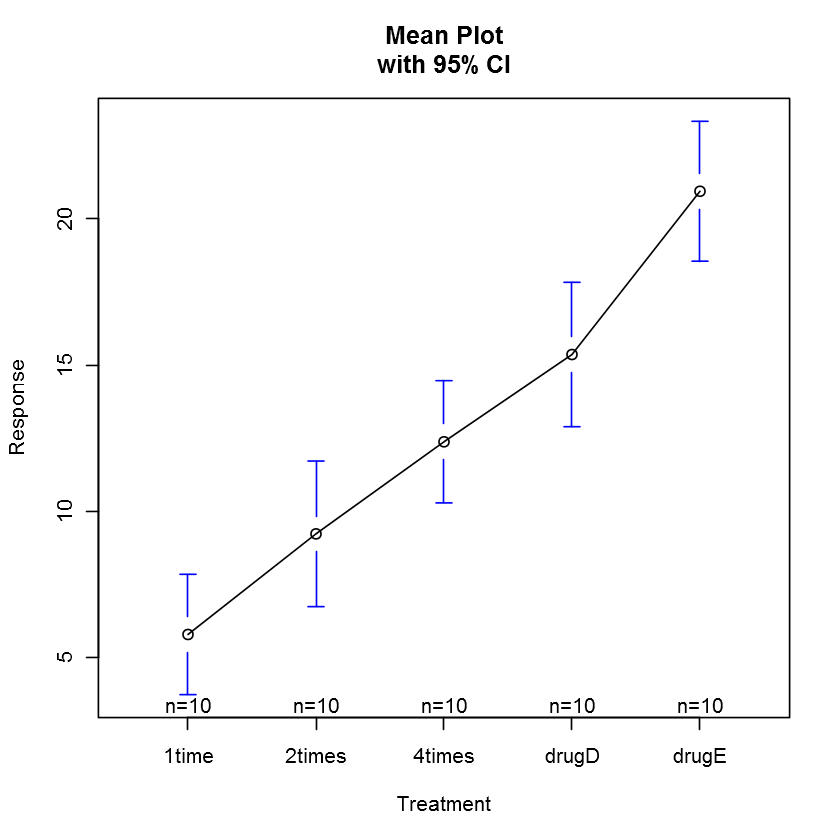

In [3]:
#单因素方差分析
#以multcomp包中cholesterol数据集为例，50个患者均接受降低胆固醇药物治疗（trt）五种疗法中的一种疗法
library(multcomp)
attach(cholesterol)

table(trt)  #各组样本大小
#输出结果看，每10个患者接受其中一个药物疗法

aggregate(response,by=list(trt),FUN=mean) #各组均值
#均值显示drygE降低胆固醇最多，而1time降低胆固醇最少

aggregate(response,by=list(trt),FUN=sd) #各组标准差
#各组的标准差相对恒定，在2.88到3.48间浮动

#检验组间差异（ANOVA）
fit <- aov(response ~ trt)
summary(fit)
#ANOVA对治疗方式（trt）的F检验非常显著（p<0.0001），说明五种疗法的效果不同

#绘制各组均值及其置信区间的图形
install.packages("gplots")
library(gplots)
plotmeans(response ~ trt, xlab="Treatment",ylab="Response",
         main="Mean Plot\nwith 95% CI")

detach(cholesterol)

## 9.3.1 多重比较